## PORTFOLIO MANAGEMENT ON PREDICTED CLOSING PRICES

We perform portfolio management in 50 tickers from S&P 500 stocks picked randomly. We have reduced the number so that it is easy to analyse the data. The approach can be extended to any number of stocks.

### Import the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stocker import Stocker
from fastai.structured import add_datepart
import numpy
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import quandl 

### Get previous closing prices for stocks

The porfolio management analysis is not restricted to only predicted stock values. Initially for our EDA we used the historical stock prices of 6 tickers. We take 3 month range starting from 03-01-2017 to 06-01-2017. 

In [3]:
quandl.ApiConfig.api_key = '<YOUR-API-KEY>'

def get_stock_prices(stocks_data, companies, start_date, end_date):
    date_range = (start_date, end_date)
    tickers = companies
    tickerobjs = {} 
    for ticker in tickers:
        tickerobjs[ticker] = (Stocker(ticker=ticker))

    for i, (k, v) in enumerate(tickerobjs.items()): 
        print(i, k, v)
    
    count = 1000

    for i, (ticker, stocker) in enumerate(tickerobjs.items()):
        df = stocker.make_df(date_range[0], date_range[1])
        # ddd date features
        add_datepart(df, 'Date', drop=False)
        # drop unwanted columns date feature columns
        df = df.drop(['Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'], axis=1)
        df['Is_month_end'] = df['Is_month_end'].astype(int)
        df['Is_month_start'] = df['Is_month_start'].astype(int)
        # setting index as date
        df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
        df.index = df['Date']
        # sort df by date
        df = df.sort_index(ascending=True, axis=0)

        stocks_data[ticker] = df['Adj. Close']

In [4]:
companies = ['INTL', 'QCOM', 'FB', 'AMZN', 'MCD', 'WFC']
stocks_data = {}
get_stock_prices(stocks_data, companies, '03-01-2017', '06-01-2017')

INTL Stocker Initialized. Data covers 1996-11-15 to 2018-03-27.
QCOM Stocker Initialized. Data covers 1991-12-16 to 2018-03-27.
FB Stocker Initialized. Data covers 2012-05-18 to 2018-03-27.
AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-03-27.
MCD Stocker Initialized. Data covers 1970-01-02 to 2018-03-27.
WFC Stocker Initialized. Data covers 1972-06-01 to 2018-03-27.
0 INTL <stocker.Stocker object at 0x1a2bef64a8>
1 QCOM <stocker.Stocker object at 0x11fc4ce48>
2 FB <stocker.Stocker object at 0x110d692e8>
3 AMZN <stocker.Stocker object at 0x11ec4f208>
4 MCD <stocker.Stocker object at 0x10f638438>
5 WFC <stocker.Stocker object at 0x111c91cc0>


/Users/nanditadwivedi/Documents/courses/Term2/bigProject/portfolio-risk-assessment-using-ml/stocker.py:178: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
/Users/nanditadwivedi/Documents/courses/Term2/bigProject/portfolio-risk-assessment-using-ml/stocker.py:179: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]


In [5]:
stocks_data

{'INTL': Date
 2017-03-01    39.170
 2017-03-02    38.490
 2017-03-03    38.250
 2017-03-06    38.010
 2017-03-07    37.910
 2017-03-08    38.130
 2017-03-09    38.210
 2017-03-10    37.780
 2017-03-13    38.420
 2017-03-14    38.230
 2017-03-15    38.750
 2017-03-16    39.820
 2017-03-17    36.810
 2017-03-20    36.900
 2017-03-21    36.420
 2017-03-22    36.270
 2017-03-23    36.530
 2017-03-24    36.160
 2017-03-27    36.240
 2017-03-28    36.550
 2017-03-29    36.640
 2017-03-30    37.660
 2017-03-31    37.960
 2017-04-03    37.530
 2017-04-04    37.210
 2017-04-05    36.690
 2017-04-06    36.710
 2017-04-07    36.560
 2017-04-10    36.460
 2017-04-11    36.480
                ...  
 2017-04-20    36.650
 2017-04-21    36.470
 2017-04-24    36.800
 2017-04-25    37.110
 2017-04-26    37.680
 2017-04-27    37.540
 2017-04-28    37.350
 2017-05-01    37.810
 2017-05-02    38.370
 2017-05-03    37.690
 2017-05-04    37.380
 2017-05-05    36.990
 2017-05-08    36.860
 2017-05-09    37.

### Preparing the dataframe

In [6]:
def build_data(stocks_data):
    data = pd.DataFrame()
    for k in stocks_data:
        data[k] = stocks_data[k]
    return data

#### This code should be uncommented if historical data is fetched from Quandal to get portfolio

In [7]:
# data = build_data(stocks_data)
# returns = data.pct_change()[1:]

#### Following snippet reads the predicted Adj. Closing price values generated from LSTM

We take one quater of data i.e. 90 days to bulilt our portfolio for 50 tickers.

In [8]:
data = pd.read_csv('predicted_adj_close_50.csv')
data.index = data['Date']
data = data.drop('Date',1)
data = data.sort_index(ascending=True, axis=0)
data = data.iloc[0:91]
returns = data.pct_change()[1:]
len(returns)

90

In [10]:
returns

,amgn,gd,nwl,zion,mat,vno,sbac,flir,wfc,aee,...,amp,ndaq,ual,apa,re,gww,dte,cf,aig,msci
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-08,-0.004187,-0.002171,-0.009437,-0.008434,-0.004149,-0.001434,0.000687,-0.003073,-0.005088,-0.003132,...,0.004792,0.012546,0.001473,0.000433,0.005208,0.018875,-0.002525,0.030731,-0.005232,-0.004489
2017-05-09,0.005446,0.002216,0.010914,0.000461,0.016605,0.005985,-0.001830,0.002420,0.008095,0.003551,...,0.036411,0.019858,0.015920,0.014923,0.012605,0.018969,0.004755,0.029367,0.005190,0.018928
2017-05-10,0.005077,0.003764,0.012774,0.007460,0.008459,-0.000546,0.007622,0.004524,0.005637,0.003240,...,0.022692,0.013065,0.006170,0.011703,0.010743,0.015546,0.006605,0.014326,0.012173,0.010233
2017-05-11,0.002005,0.000791,0.012239,0.004653,0.001661,-0.000190,0.005145,0.003852,0.001024,0.000041,...,0.011600,0.005668,0.000177,0.006956,0.010935,0.009043,0.005039,0.005969,0.010137,0.000914
2017-05-12,-0.002751,-0.001859,0.006551,-0.001518,-0.007761,-0.003410,0.003911,0.001481,-0.004792,-0.002318,...,0.001815,0.001101,-0.003286,0.000845,0.007864,0.003671,0.002395,0.000783,0.002649,-0.006395
2017-05-15,-0.007229,-0.003279,0.000828,-0.010986,-0.014479,-0.003775,0.002190,-0.001924,-0.009625,-0.003946,...,-0.006394,-0.001537,-0.005369,-0.005615,0.004840,-0.000621,-0.000533,-0.002236,-0.007748,-0.011156
2017-05-16,0.002220,0.001076,0.012153,-0.001973,0.010549,0.002846,-0.003871,0.004220,0.003862,0.002585,...,0.024089,0.008271,0.011423,0.012440,0.012634,0.005216,0.006469,0.003495,0.004242,0.014304
2017-05-17,0.002702,0.002603,0.006372,0.005203,-0.005207,-0.001635,0.002267,0.006112,0.003744,0.002832,...,0.015005,0.005156,0.003046,0.009137,0.011053,0.002097,0.008269,-0.002622,0.011157,0.007987
2017-05-18,0.000509,-0.000402,0.002129,-0.000368,-0.002706,-0.002705,0.001739,0.003170,-0.002367,-0.000191,...,0.006879,0.001086,-0.001666,0.002514,0.007377,0.000670,0.006409,-0.004762,0.009042,-0.000577


In [9]:
companies = data.columns
#companies = list(map(lambda x: x.upper(), companies))
companies = list(companies)
len(companies)

50

In [11]:
companies

['amgn',
 'gd',
 'nwl',
 'zion',
 'mat',
 'vno',
 'sbac',
 'flir',
 'wfc',
 'aee',
 'fcx',
 'ksu',
 'mtb',
 'duk',
 'tss',
 'etr',
 'pnr',
 'incy',
 'regn',
 'mdlz',
 'wynn',
 'pep',
 'dva',
 'ads',
 'mnst',
 'sti',
 'akam',
 'tfx',
 'wat',
 'antm',
 'hon',
 'o',
 'usb',
 'ma',
 'rtn',
 'sna',
 'dre',
 'csx',
 'pcar',
 'pru',
 'amp',
 'ndaq',
 'ual',
 'apa',
 're',
 'gww',
 'dte',
 'cf',
 'aig',
 'msci']

### Check returns for any ticker

#### Time series of Returns

The following plots show time series of return of ticker 'vno' ie 'Vornado Realty Trust'. It can be seen that returns have declined in late July'17. Similarly teh distribution of returns can be seen in next plot.

Analyzing returns for:  vno


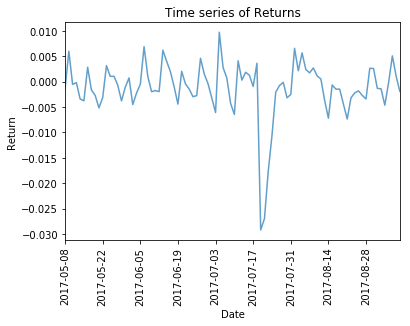

In [24]:
ticker = companies[5]
print("Analyzing returns for: ", ticker)
plt.title('Time series of Returns')
returns[ticker].plot(alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Return")
plt.show()

Analyzing returns for:  vno


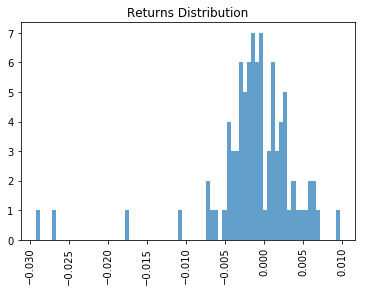

In [25]:
print("Analyzing returns for: ", ticker)
plt.hist(returns[ticker].dropna(), bins=75, density=False, alpha=0.7)
plt.title('Returns Distribution')
plt.xticks(rotation=90)
plt.show()

### Calculating covariance and correlation between stocks

We calculate correlation and covariance matrix for the given list of tickers.
Correlation is a measure of how strongly the stocks are related. If correlation value for any pair of stocks is more than 0.5 we should not put them in same porfolio. This is because if 2 stocks are highly corrleated and one falls the other will fall as well and result in overall loss in porfolio. In order to keep the porfolio balanced we take consider unrelated stocks in a porfolio.

For same reason we set a threshold in Covariance value as well. If covraiance of a stock pair is greater than mean covariance we cannot put them same portfolio.

In [26]:
Covariance = returns.cov()
Correlation = returns.corr()
np.round(Correlation,3)

,amgn,gd,nwl,zion,mat,vno,sbac,flir,wfc,aee,...,amp,ndaq,ual,apa,re,gww,dte,cf,aig,msci
amgn,1.000,0.638,0.509,0.606,0.160,0.200,-0.023,0.325,0.736,0.716,...,0.665,0.574,0.554,0.594,0.583,0.549,0.670,0.433,0.588,0.402
gd,0.638,1.000,0.651,0.517,0.397,0.362,-0.043,0.391,0.749,0.857,...,0.579,0.426,0.695,0.696,0.454,0.407,0.620,0.433,0.730,0.731
nwl,0.509,0.651,1.000,0.455,0.480,0.378,-0.328,0.337,0.744,0.641,...,0.540,0.200,0.628,0.411,0.406,0.143,0.481,0.141,0.358,0.553
zion,0.606,0.517,0.455,1.000,0.108,0.226,0.188,0.140,0.667,0.506,...,0.403,0.332,0.235,0.318,0.409,0.292,0.593,0.121,0.370,0.159
mat,0.160,0.397,0.480,0.108,1.000,0.190,-0.289,0.394,0.396,0.257,...,0.082,-0.152,0.285,0.120,-0.018,-0.162,0.068,-0.082,0.177,0.413
vno,0.200,0.362,0.378,0.226,0.190,1.000,-0.302,-0.135,0.376,0.373,...,0.353,0.231,0.499,0.379,0.184,0.162,0.182,0.291,0.285,0.480
sbac,-0.023,-0.043,-0.328,0.188,-0.289,-0.302,1.000,0.004,-0.318,-0.100,...,-0.087,0.143,-0.397,-0.031,0.080,0.237,0.138,0.063,0.052,-0.409
flir,0.325,0.391,0.337,0.140,0.394,-0.135,0.004,1.000,0.307,0.279,...,0.056,-0.048,0.114,0.069,0.132,-0.023,0.294,-0.090,0.286,0.188
wfc,0.736,0.749,0.744,0.667,0.396,0.376,-0.318,0.307,1.000,0.730,...,0.630,0.357,0.635,0.532,0.532,0.286,0.616,0.255,0.548,0.626
aee,0.716,0.857,0.641,0.506,0.257,0.373,-0.100,0.279,0.730,1.000,...,0.747,0.683,0.878,0.822,0.572,0.620,0.748,0.608,0.716,0.703


#### Heat Map for correlations

The following heat map shows that tickers with darker colors are not correlated and can be in a porfolio.

In [27]:
def correlation_matrix_plot(matrix, maptype):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    if (maptype == 'cmap'):
        cax = ax1.imshow(matrix, interpolation="nearest", cmap=cmap, alpha=0.7)
    else:
        cax = ax1.imshow(matrix, interpolation="nearest", cmap=maptype, alpha=0.7)
    ax1.grid(True)
    plt.title('Stocks Correlation')
    ax1.set_xticks(np.arange(len(companies)))
    ax1.set_yticks(np.arange(len(companies)))
    ax1.set_xticklabels(companies,fontsize=10,rotation=90)
    ax1.set_yticklabels(companies,fontsize=10)
    ax1.set_alpha(0.4)
    ticks = numpy.arange(0,9,1)
    fig.colorbar(cax)
    plt.show()

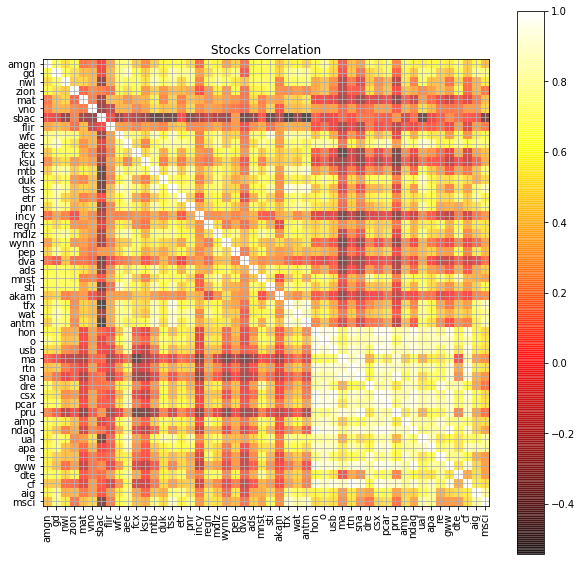

In [28]:
correlation_matrix_plot(Correlation,'hot')

#### Another represenation for correlation

The tickers that are blue have correlation less than 0.5 and can be in same portfolio.

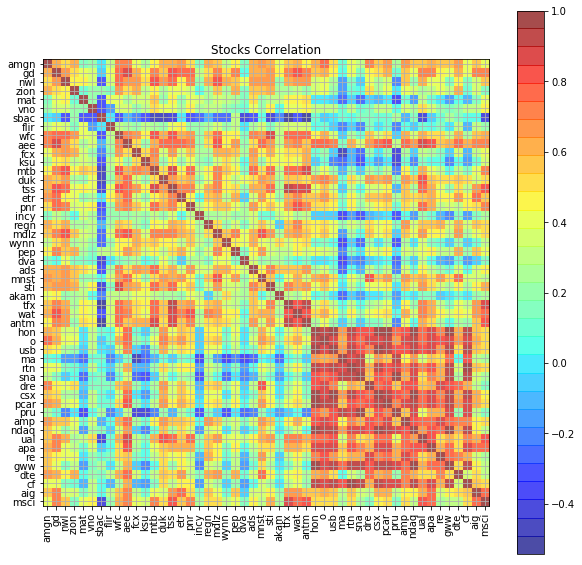

In [29]:
correlation_matrix_plot(Correlation,'cmap')

#### Check if a particular pair of stock can be paired together

If a pair of stock meets both Covariance and correlation thersholds then they can be paired together. The plot below shows pairable stocks in blue and unpairable ones in green.

In [32]:
mean_Covariance = Covariance.mean()

In [37]:
def get_pairable(data, Covariance, Correlation):
    Pairable = np.zeros(Covariance.shape)
    plt.figure(figsize=(16,7))

    for i in range(len(companies)):
        for j in range(len(companies)-i):
            if(Covariance[i,j] > mean_Covariance[i] or Covariance[i,j] > mean_Covariance[j] or Correlation[i][j]>0.5):
                plt.plot(i, j, 'o', color='green', alpha=0.5) 
            else:
                plt.plot(i, j, 'o', color='blue', alpha=0.5)
                Pairable[i,j] = 1

    plt.xlim(-1,len(companies)+1)
    plt.ylim(-1,len(companies)+1)
    plt.xticks(range(len(companies)), companies, rotation=40)    
    plt.yticks(range(len(companies)), companies)
    #plt.set_xticklabels(companies,fontsize=10,rotation=40)
    plt.legend()
    return Pairable

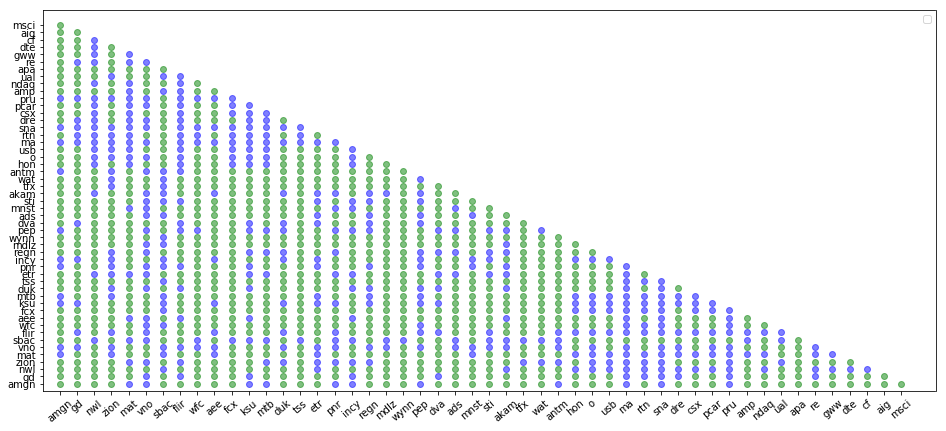

In [40]:
Pairable = get_pairable(data,np.array(Covariance), np.array(Correlation))

#### Calculating Shapre Ratio of a portfolio

"The Sharpe ratio is calculated by subtracting the risk-free rate from the return of the portfolio and dividing that result by the standard deviation of the portfolio’s excess return."

Sharpe_ratio = (Rp - Rf)/SigmaP

Rp: return of portfolio/mean return

Rf: risk-free rate of 2% ie current risk free rate of US market

SigmaP: standard deviation of the portfolio’s excess return

A higher value of Sharpe ratio means better risk-adjusted return. 

Sharpe ratio > 1 is considered good

Sharpe ratio > 2 is considered very good

Sharpe ratio > 3 is considered excellent

In [41]:
Rf = 2/100  #risk_free_rate
stocks_rng = range(len(companies))

def sharpe_ratio(pair, portfolio_weights, meanR, cov):    
    Rp = portfolio_weights.dot(meanR.T) 
    SigmaP = portfolio_weights.dot(cov.dot(portfolio_weights.T)) * len(returns)
    s_ratio = (Rp - Rf)/np.sqrt(SigmaP)
    return s_ratio

# portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, 
#                             np.dot(cov_mat_annual, portfolio_weights)))

#### Checking whether other stocks can be added to selected pair

Every other stock that is not correlated to th pair can be in same portfolio as pair.

In [42]:
def check_pairs(pair):
    not_in_pair = []
    for i in stocks_rng:
        if(i not in pair):
            not_in_pair.append(i)
        else:
            continue
            
    for tick in not_in_pair:
        total_pair = len(pair)
        for i in pair:
            if(Pairable[tick,i]!=1 or Pairable[i,tick]!=1):
                total_pair -= 1
        if(float(total_pair)/len(pair) > 0.5):
            pair.add(tick)              
    return pair

#### Selecting optimized portfolios

We create all possible combinations of pairs in given list of tickers. For example for n tickers possible pairs can be nC2. 

For each pair we check which other stock can be added together by checking it's correlation and covariance values, and add them in same portfolio.

Portfolis with good, better, best Sharpe Ratio is saved seperately.

In [43]:
portfolio_collection = []
optim = {'good':[],'better':[],'best': []}

def select(combo):
    pair = set(combo)
    pair = check_pairs(pair)
    #print("new pair by checking pairable: ", pair)
    if pair in portfolio_collection:
        #print('returning')
        return
    portfolio_collection.append(pair)
    #print("portfoilio: ", portfolio_collection)
    sharpe_r = 0
    eff_weights = np.ones(len(pair))

    symbols = [companies[s] for s in pair]        
    mean_returns = np.array(returns[symbols].mean()) * len(returns)
    sub_cov_mat = np.array(returns[symbols].cov())        

    for _ in range(200):
        weights = [np.random.randint(50,500) for _ in pair]
        weights = np.array(weights, dtype=float)
        weights /= weights.sum()
        s_r = sharpe_ratio(pair, weights, mean_returns, sub_cov_mat)
        if( s_r > sharpe_r):
            sharpe_r = s_r
            eff_weights = weights
        
    if (sharpe_r >= 1 and sharpe_r < 2) :
        optim['good'].append([[companies[s] for s in pair],eff_weights,sharpe_r])
    if (sharpe_r >= 2 and sharpe_r < 3) :
        optim['better'].append([[companies[s] for s in pair],eff_weights,sharpe_r])
    if(sharpe_r >=3) :
        optim['best'].append([[companies[s] for s in pair],eff_weights,sharpe_r])

In [44]:
from itertools import combinations
count=0
run = list(combinations(stocks_rng,2))
for combo in run:
    count +=1
    if(Pairable[combo[0],combo[1]]!=1 or Pairable[combo[1],combo[0]]!=1):
        continue
    else:
        #print("taking the combo")
        select(combo)
print("number of combinations: ", count)

number of combinations:  1225


In [45]:
optim['good']

[[['amgn', 'ksu', 'pnr', 'regn', 'pep', 'dva'],
  array([0.11695, 0.33543, 0.06373, 0.32283, 0.08613, 0.07493]),
  1.1489695857220457],
 [['amgn', 'ma', 'vno', 'flir', 'duk', 'pnr', 'regn', 'pep', 'dva', 'akam'],
  array([0.20123, 0.15679, 0.06214, 0.02263, 0.16214, 0.0321 , 0.15309, 0.10082, 0.08436, 0.02469]),
  1.2568378458285336],
 [['ma', 'nwl', 'etr', 'pnr', 'akam'],
  array([0.3631 , 0.09351, 0.3235 , 0.16681, 0.05307]),
  1.9374486278081846],
 [['nwl', 'dre'], array([0.11983, 0.88017]), 1.763843228970642],
 [['nwl', 'pru'], array([0.12373, 0.87627]), 1.0880552188390333],
 [['nwl', 'gww'], array([0.10806, 0.89194]), 1.3046605809989642],
 [['ma', 'zion', 'vno', 'flir', 'aee', 'duk', 'pnr', 'regn', 'pep', 'akam'],
  array([0.2237 , 0.22608, 0.08996, 0.03475, 0.08901, 0.02903, 0.03903, 0.14612, 0.06663, 0.05569]),
  1.061628414576248],
 [['ma', 'zion', 'mtb', 'etr', 'pnr', 'regn', 'pep', 'akam'],
  array([0.19629, 0.05703, 0.12069, 0.13859, 0.12401, 0.24469, 0.08488, 0.03382]),
  1

In [46]:
optim['better']

[[['amgn', 'ma', 'sna', 'mat', 'vno', 'aee', 'ksu', 'etr', 'pnr'],
  array([0.05056, 0.21087, 0.17375, 0.05056, 0.05702, 0.11781, 0.20925, 0.0511 , 0.07907]),
  2.491457885351133],
 [['amgn', 'ma', 'sna', 'mat', 'vno', 'pru', 'aee', 'ksu'],
  array([0.07195, 0.20133, 0.27811, 0.03325, 0.08343, 0.03507, 0.17291, 0.12394]),
  2.9643512081675656],
 [['amgn', 'ma', 'sna', 'mat', 'vno', 'pru', 'aee'],
  array([0.21351, 0.25683, 0.25632, 0.03146, 0.07684, 0.0459 , 0.11913]),
  2.8876624274650853],
 [['gd', 'ma', 'sna', 'vno', 'flir', 'pru', 'aee'],
  array([0.11898, 0.22929, 0.23988, 0.07322, 0.06792, 0.15222, 0.1185 ]),
  2.814803641085948],
 [['gd', 'ma', 'sna', 'vno', 'flir', 'aee', 'ksu', 'duk', 'pnr', 'pep', 'dva'],
  array([0.06345, 0.1347 , 0.17689, 0.03758, 0.03013, 0.16909, 0.08933, 0.03049, 0.02233, 0.10635, 0.13967]),
  2.658530039483297],
 [['ma', 'nwl', 'akam', 'etr'],
  array([0.59651, 0.17158, 0.16086, 0.07105]),
  2.688643279325257],
 [['ma', 'nwl', 'sbac', 'etr', 'pnr', 'aka

In [47]:
optim['best']

[[['amgn', 'ma', 'sna', 'mat'],
  array([0.14037, 0.40266, 0.39037, 0.0666 ]),
  3.7650966656840996],
 [['amgn', 'ma', 'mtb', 'pep'],
  array([0.07032, 0.47777, 0.07032, 0.38159]),
  3.917524059587658],
 [['gd', 'ksu', 'dva', 'ma'],
  array([0.1557 , 0.11946, 0.09128, 0.63356]),
  3.8926935029698893],
 [['gd', 'ma', 'flir', 'ksu', 'duk', 'regn', 'pep', 'dva'],
  array([0.07115, 0.2333 , 0.05712, 0.15682, 0.02565, 0.22894, 0.08035, 0.14666]),
  3.164460019139058],
 [['gd', 'rtn', 'ma', 'flir', 'ksu', 'dva'],
  array([0.07647, 0.14031, 0.317  , 0.04232, 0.317  , 0.1069 ]),
  3.501330486550698],
 [['gd', 'ma', 'sna', 'vno', 'flir', 'aee', 'ksu', 'duk', 'pep', 'dva'],
  array([0.04006, 0.15946, 0.16462, 0.0472 , 0.0242 , 0.0353 , 0.1547 , 0.07775, 0.14042, 0.15629]),
  3.138840169794555],
 [['gd', 'ma', 'sna', 'dre', 'vno', 'flir'],
  array([0.11822, 0.2974 , 0.20297, 0.19257, 0.04238, 0.14647]),
  3.4406041837751187],
 [['gd', 'ma', 'sna', 'vno', 'flir', 're'],
  array([0.19666, 0.17258, 

In [48]:
portfolio_collection

[{0, 4, 33, 35},
 {0, 5, 16, 18, 21, 23, 26},
 {0, 11, 16, 18, 21, 22},
 {0, 12, 21, 33},
 {0, 5, 6, 11, 15, 16, 21, 23, 26, 33},
 {0, 17, 21, 25},
 {0, 5, 7, 13, 16, 18, 21, 22, 26, 33},
 {0, 5, 6, 16, 21, 26, 29},
 {0, 4, 5, 9, 11, 15, 16, 33, 35},
 {0, 4, 5, 9, 11, 33, 35, 39},
 {0, 4, 5, 9, 33, 35, 39},
 {1, 5, 7, 9, 33, 35, 39},
 {1, 11, 22, 33},
 {1, 17},
 {1, 7, 11, 13, 18, 21, 22, 33},
 {1, 5, 7, 9, 11, 13, 16, 21, 22, 33, 35},
 {1, 7, 11, 22, 33, 34},
 {1, 5, 7, 9, 11, 13, 21, 22, 33, 35},
 {1, 5, 7, 33, 35, 36},
 {1, 5, 7, 33, 35, 44},
 {2, 6, 26},
 {2, 15, 26, 33},
 {2, 6, 15, 16, 26, 33},
 {2, 30},
 {2, 31},
 {2, 32},
 {2, 15, 16, 26, 33},
 {2, 34},
 {2, 35},
 {2, 36},
 {2, 37},
 {2, 38},
 {2, 39},
 {2, 41},
 {2, 44},
 {2, 45},
 {2, 46},
 {2, 47},
 {3, 4, 15, 16, 33},
 {3, 5, 7, 9, 13, 16, 18, 21, 26, 33},
 {3, 12, 15, 16, 18, 21, 26, 33},
 {3, 5, 7, 13, 16, 18, 21, 22, 26, 33},
 {3, 4, 5, 15, 16, 18, 26, 33},
 {3, 5, 6, 7, 13, 16, 18, 21, 25, 26},
 {3, 13, 15, 17, 33},
 {3

In [49]:
better = pd.DataFrame.from_dict(optim['better'])
better.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']

In [50]:
portfolio_return = []

for row in better.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    #mean = ((1+np.mean(returns[row[1][0]]))**252)-1 #annulazied return for 252 trading days
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    #print('Rp:', Rp)
    
better['Portfolio Return'] = portfolio_return

In [51]:
portfolio_volatility = []

for row in better.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

better['Portfolio Volatility'] = portfolio_volatility
better

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[amgn, ma, sna, mat, vno, aee, ksu, etr, pnr]","[0.05056481979558903, 0.21086605701990319, 0.1...",2.491458,9.11,3.081488
1,"[amgn, ma, sna, mat, vno, pru, aee, ksu]","[0.07194679564691657, 0.20133010882708585, 0.2...",2.964351,12.32,4.095556
2,"[amgn, ma, sna, mat, vno, pru, aee]","[0.21351211964930378, 0.25683341928829295, 0.2...",2.887662,13.21,4.583065
3,"[gd, ma, sna, vno, flir, pru, aee]","[0.11897880539499037, 0.22928709055876687, 0.2...",2.814804,12.75,3.715106
4,"[gd, ma, sna, vno, flir, aee, ksu, duk, pnr, p...","[0.06345267635590217, 0.13470400567174762, 0.1...",2.658530,8.01,2.522442
5,"[ma, nwl, akam, etr]","[0.596514745308311, 0.17158176943699732, 0.160...",2.688643,10.48,3.105017
6,"[ma, nwl, sbac, etr, pnr, akam]","[0.35842026825633383, 0.1557377049180328, 0.11...",2.335163,8.30,1.993128
7,"[nwl, rtn]","[0.10727969348659004, 0.89272030651341]",2.869085,23.52,7.550832
8,"[ndaq, nwl]","[0.9034608378870674, 0.0965391621129326]",2.038314,22.77,3.498246
9,"[ma, zion, mat, etr, pnr]","[0.4468980021030494, 0.09884332281808622, 0.06...",2.481023,9.70,2.516807


/anaconda3/envs/new36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


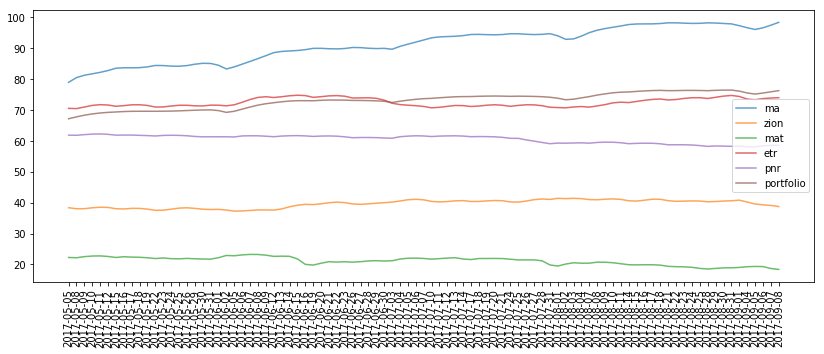

In [52]:
def plot_volatility(portfolio, weights):
    portfolio_data = data[portfolio]
    volatility = portfolio_data.mul(weights,axis=1).sum(axis=1)
    portfolio_data['portfolio'] = volatility
    plt.figure(figsize=(14,5))
    plt.plot(portfolio_data.index, portfolio_data,alpha=0.7)
    plt.legend(portfolio + ['portfolio'])
    plt.xticks(rotation=90)
    plt.show()

plot_volatility(better['Portfolio'][9], better['Weights'][9])

In [57]:
better['PortfolioL'] = better['Portfolio'].apply(lambda x: ','.join(map(str, x)))

<Figure size 1008x360 with 0 Axes>

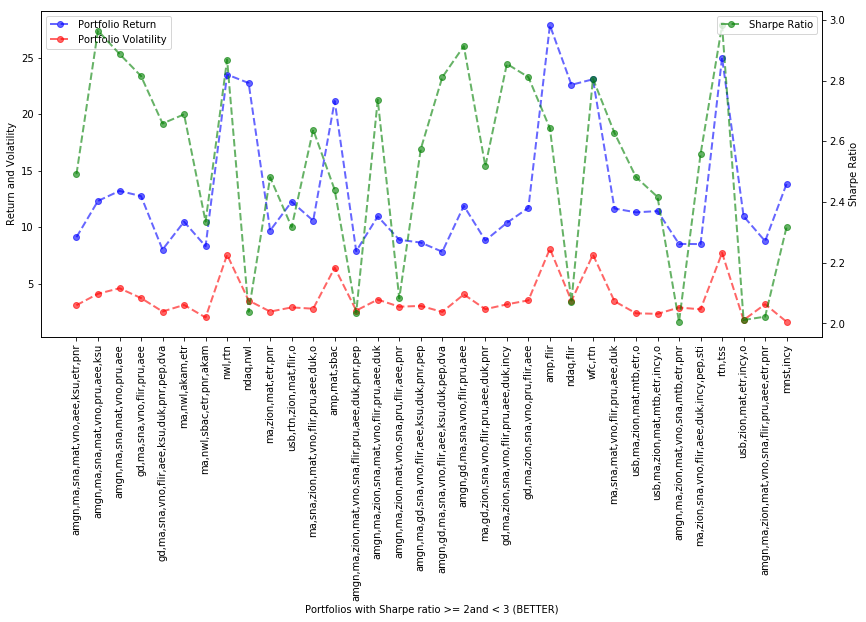

In [59]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(better['PortfolioL'], better['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(better['PortfolioL'], better['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(better['PortfolioL'],better['Portfolio Volatility'], 'r-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)

ax1.set_xlabel('Portfolios with Sharpe ratio >= 2and < 3 (BETTER)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()


In [60]:
good = pd.DataFrame.from_dict(optim['good'])
good.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']
portfolio_return = []

for row in good.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    
good['Portfolio Return'] = portfolio_return

portfolio_volatility = []

for row in good.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

good['Portfolio Volatility'] = portfolio_volatility
good

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[amgn, ksu, pnr, regn, pep, dva]","[0.1169467787114846, 0.33543417366946776, 0.06...",1.148970,4.88,6.688525
1,"[amgn, ma, vno, flir, duk, pnr, regn, pep, dva...","[0.20123456790123456, 0.15679012345679014, 0.0...",1.256838,4.70,3.951709
2,"[ma, nwl, etr, pnr, akam]","[0.36310025273799496, 0.09351305812973884, 0.3...",1.937449,7.66,1.923623
3,"[nwl, dre]","[0.11983471074380166, 0.8801652892561983]",1.763843,12.08,0.595499
4,"[nwl, pru]","[0.12373225152129817, 0.8762677484787018]",1.088055,6.98,1.572087
5,"[nwl, gww]","[0.10805500982318271, 0.8919449901768173]",1.304661,15.68,8.279561
6,"[ma, zion, vno, flir, aee, duk, pnr, regn, pep...","[0.2237029985721085, 0.22608281770585437, 0.08...",1.061628,4.77,3.586961
7,"[ma, zion, mtb, etr, pnr, regn, pep, akam]","[0.1962864721485411, 0.05702917771883289, 0.12...",1.734855,6.60,5.324637
8,"[ma, zion, mat, vno, sna, flir, aee, duk, etr,...","[0.18427323272438442, 0.07664813343923749, 0.0...",1.782825,7.37,2.631992
9,"[mnst, mat]","[0.896551724137931, 0.10344827586206896]",1.755533,11.87,1.461148


In [61]:
good['PortfolioL'] = good['Portfolio'].apply(lambda x: ','.join(map(str, x)))

<Figure size 1008x360 with 0 Axes>

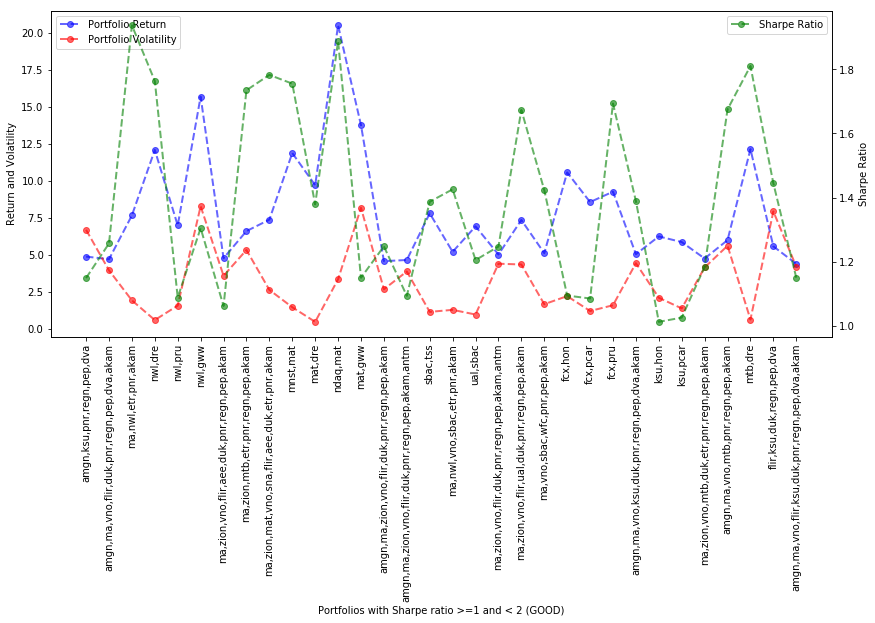

In [80]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(good['PortfolioL'], good['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(good['PortfolioL'], good['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(good['PortfolioL'],good['Portfolio Volatility'], 'r-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)

ax1.set_xlabel('Portfolios with Sharpe ratio >=1 and < 2 (GOOD)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()

In [70]:
best = pd.DataFrame.from_dict(optim['best'])
best.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']
portfolio_return = []

for row in best.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    
best['Portfolio Return'] = portfolio_return

portfolio_volatility = []

for row in best.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

best['Portfolio Volatility'] = portfolio_volatility
best

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[amgn, ma, sna, mat]","[0.1403688524590164, 0.4026639344262295, 0.390...",3.765097,20.05,6.608108
1,"[amgn, ma, mtb, pep]","[0.0703205791106515, 0.47776628748707345, 0.07...",3.917524,11.75,3.188686
2,"[gd, ksu, dva, ma]","[0.15570469798657718, 0.11946308724832215, 0.0...",3.892694,14.21,3.601318
3,"[gd, ma, flir, ksu, duk, regn, pep, dva]","[0.07115198451113262, 0.23330106485963215, 0.0...",3.164460,8.08,5.279839
4,"[gd, rtn, ma, flir, ksu, dva]","[0.07646622123236822, 0.1403118040089087, 0.31...",3.501330,11.55,3.296036
5,"[gd, ma, sna, vno, flir, aee, ksu, duk, pep, dva]","[0.04006346687822293, 0.15946053153510512, 0.1...",3.138840,8.45,2.632479
6,"[gd, ma, sna, dre, vno, flir]","[0.11821561338289963, 0.29739776951672864, 0.2...",3.440604,14.92,3.666165
7,"[gd, ma, sna, vno, flir, re]","[0.19665551839464884, 0.1725752508361204, 0.25...",3.895020,17.73,6.291794
8,"[nwl, o]","[0.11899791231732777, 0.8810020876826722]",4.094865,21.22,2.839103
9,"[nwl, sna]","[0.11777301927194861, 0.8822269807280514]",3.885943,26.52,8.983691


In [71]:
best['PortfolioL'] = best['Portfolio'].apply(lambda x: ','.join(map(str, x)))

<Figure size 1008x360 with 0 Axes>

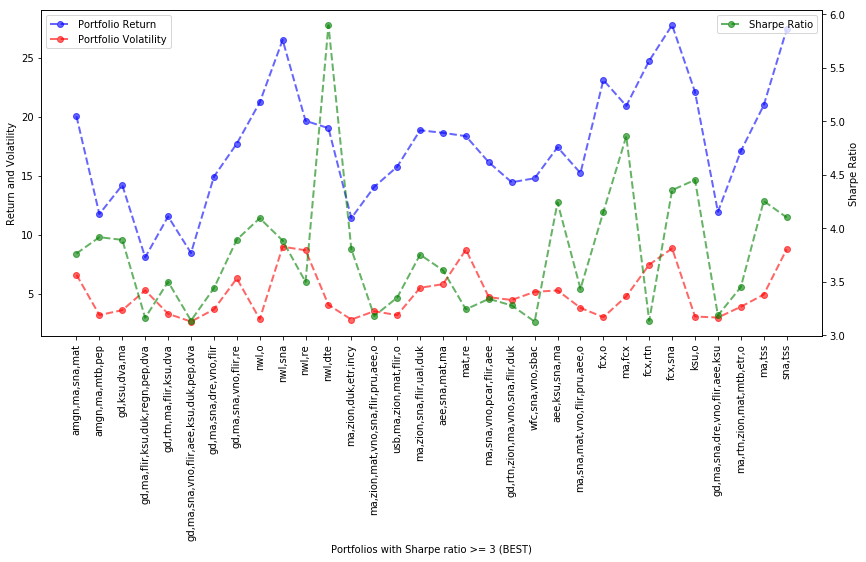

In [81]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(best['PortfolioL'], best['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(best['PortfolioL'], best['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(best['PortfolioL'],best['Portfolio Volatility'], 'r-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)

ax1.set_xlabel('Portfolios with Sharpe ratio >= 3 (BEST)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()

Volatility of a stock can be measured from it's standard deviation. The following code calculates standard deviation of each ticker for the taken time period. A higher volatililty means that the security is more risky. This means AMZN has the highest risk in the considered time period.


We calculate volatility of a portfolio in the 4 stocks picked by assigning random weights that add up to 1. Each close price value for a stock is multipled with its respective weight.
σPortfolio = Sqrt(wT⋅Σ⋅w)

In [74]:
def get_ticker_volatility(portfolio):
    tick_std = np.std(data[portfolio])
    print(tick_std)

In [75]:
get_ticker_volatility(better['Portfolio'][7])

nwl    0.87801
rtn    8.49211
dtype: float64


In [76]:
better['Portfolio Volatility'][7]

7.550832409653016